
### Implementation and running time visualization of basic **Comparison-Sort** Algorithms:<br>
- Bubble sort 
- Selection sort
- Insertion sort
- Quicksort
- Mergesort
- Heapsort

By: Aziz Alto

Thanx to Wikipedia and [Python Algorithms book](http://www.amazon.com/Python-Algorithms-Mastering-Basic-Language/dp/1430232374/).


### First: Algorithms Implementation

**Algorithm**: Bubble Sort<br>
**Time copelxity**: best $(n)$, average $(n^2)$, worst $(n^2)$<br>
**Stable sort? :** yes

In [1]:
def bubble_sort(seq):
    for passnum in range(len(seq) - 1, 0, -1):
        for i in range(passnum):
            if seq[i] > seq[i + 1]:
                seq[i], seq[i + 1] = seq[i + 1], seq[i]

**Algorithm**: Selection Sort<br>
**Time copelxity**: best $(n^2)$, average $(n^2)$, worst $(n^2)$<br>
**stable sort?** no

In [2]:
def selection_sort(seq):
    for i in range(len(seq) - 1):
        mini, miniat = seq[i], i
        for j in range(i + 1, len(seq)):
            if seq[j] < mini:
                mini, miniat = seq[j], j
        seq[i], seq[miniat] = seq[miniat], seq[i]

**Algorithm**: Insertion Sort<br>
**Time copelxity**: best $(n)$, average $(n^2)$, worst $(n^2)$<br>
**stable sort?** yes

In [3]:
def insertion_sort(seq):
    for i in range(1, len(seq)):
        j = i
        while j > 0 and seq[j - 1] > seq[j]:
            seq[j - 1], seq[j] = seq[j], seq[j - 1]
            j -= 1

**Algorithm**: Quick Sort<br>
**Time copelxity**: best $(n\,lg\,n)$, average $(n\,lg\,n)$, worst $(n^2)$<br>
**stable sort?** no

In [4]:
def partition(seq):
    pi, seq = seq[0], seq[1:]
    lo = [x for x in seq if x <= pi]
    hi = [x for x in seq if x > pi]
    return lo, pi, hi


def quicksort(seq):
    if len(seq) <= 1:
        return seq
    lo, pi, hi = partition(seq)
    return quicksort(lo) + [pi] + quicksort(hi)

**Algorithm**: Merge sort<br>
**Time copelxity**: best $(n\,lg\,n)$, average $(n\,lg\,n)$, worst $(n\,lg\,n)$<br>
**stable sort?** yes

In [5]:
def mergesort(seq):
    
    mid = len(seq) // 2
    lft, rgt = seq[:mid], seq[mid:]
    if len(lft) > 1:
        lft = mergesort(lft)
    if len(rgt) > 1:
        rgt = mergesort(rgt)
    res = []
    while lft and rgt:
        if lft[-1] >= rgt[-1]:
            res.append(lft.pop())
        else:
            res.append(rgt.pop())
    res.reverse()
    
    return (lft or rgt) + res


**Algorithm**: Heapsort<br>
**Time copelxity**: best $(n\,lg\,n)$, average $(n\,lg\,n)$, worst $(n\,lg\,n)$<br>
**stable sort?** no

In [24]:
def heapify(seq, i, n):
    l, r = 2 * i + 1, 2 * (i + 1)
    maxat = i
    if l <= n and seq[l] > seq[i]:
        maxat = l
    if r <= n and seq[r] > seq[maxat]:
        maxat = r
    if maxat != i:
        seq[i], seq[maxat] = seq[maxat], seq[i]
        heapify(seq, maxat, n)


def buildheap(seq, s, n):
    for i in range(s, -1, -1):
        heapify(seq, i, n)


def heapsort(seq):
    end = len(seq) - 1
    start = end // 2
    buildheap(seq, start, end)

    for i in range(end, 0, -1):
        seq[0], seq[i] = seq[i], seq[0]
        end -= 1
        heapify(seq, 0, end)

### Second: Visualizing running time compelxity

In [13]:
%matplotlib inline
from time import time
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
def timeit(method, data):
    t1 = time()
    method(data)
    t2 = time()
    return t2 - t1

In [15]:
population = range(10**5)
data = lambda i: rnd.sample(population, base_size*i)

In [26]:
base_size = 1000
num_samples = range(1, 12)
times = lambda algo: [timeit(algo, data(i)) for i in num_samples]

In [27]:
%%time
# dataframe
cols = ['sample_size', 'Bubble_sort', 'Selection_sort', 'Insertion_sort', 'quicksort', 'mergesort', 'heapsort']
log = pd.DataFrame(columns=cols)
# record the sort times of each algorithm
log['sample_size'] = [base_size*i for i in num_samples]
log['Bubble_sort'] = times(bubble_sort)
log['Selection_sort'] = times(selection_sort)
log['Insertion_sort'] = times(insertion_sort)
log['quicksort'] = times(quicksort)
log['mergesort'] = times(mergesort)
log['heapsort'] = times(heapsort)

CPU times: user 2min 10s, sys: 406 ms, total: 2min 10s
Wall time: 2min 14s


In [28]:
log

,sample_size,Bubble_sort,Selection_sort,Insertion_sort,quicksort,mergesort,heapsort
0,1000,0.132912,0.037669,0.087791,0.006597,0.007391,0.006180
1,2000,0.445051,0.139929,0.353598,0.011519,0.019856,0.017360
2,3000,1.008119,0.317585,0.847586,0.019350,0.028392,0.037250
3,4000,1.753612,0.568740,1.486928,0.022563,0.025901,0.052769
4,5000,2.772602,0.882669,2.341330,0.026285,0.032225,0.050307
5,6000,3.947315,1.274324,3.447560,0.033526,0.052471,0.069614
6,7000,5.447676,1.731779,5.512184,0.047125,0.069373,0.087591
7,8000,7.075057,2.279072,6.715540,0.049428,0.090993,0.084965
8,9000,8.946219,2.910003,7.534356,0.056165,0.081469,0.115995
9,10000,14.829893,3.591000,9.151593,0.052898,0.093171,0.137064


In [29]:
# plot
def plot(columns=cols[1:], title=''):
    log[columns].plot(figsize=(10,6), marker='x')
    plt.ylabel('time (sec)');plt.xlabel('Sample Size ( * {})'.format(base_size))
    plt.grid()
    plt.title(title)

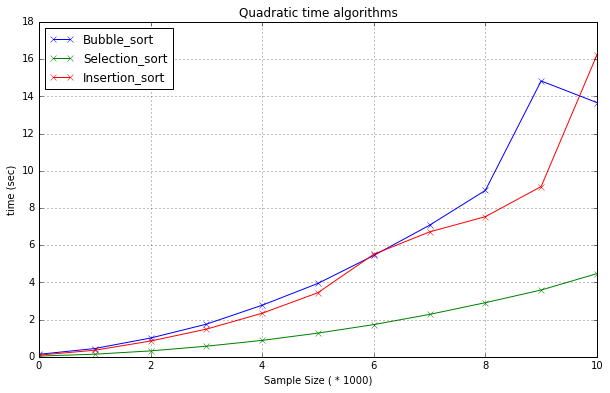

In [30]:
plot(cols[1:4], 'Quadratic time algorithms')

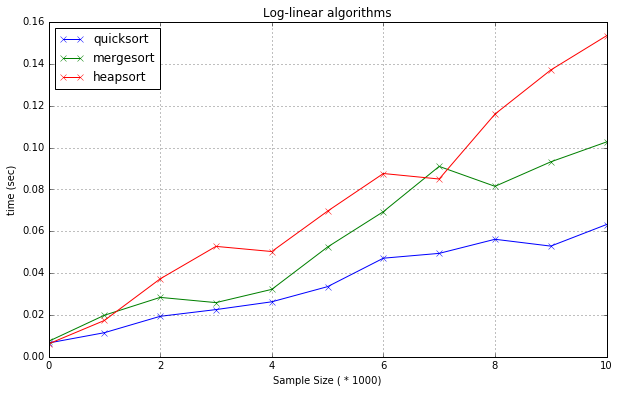

In [31]:
plot(cols[4:], 'Log-linear algorithms')

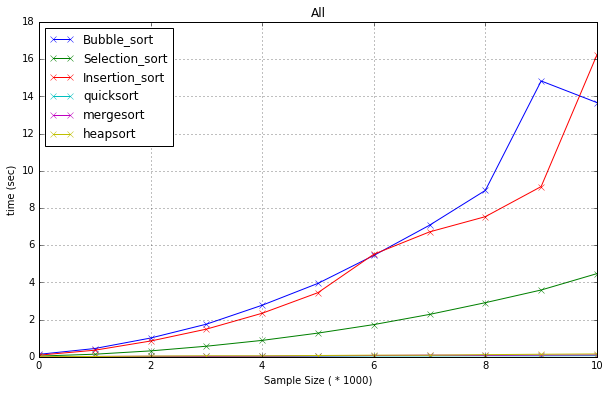

In [32]:
plot(title='All')

<hr>